# UZOP projekt: Preditcing NBA shots
## Student: Timon Rodić
## JMBAG: 0036529975

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Učitavanje i prikaz podataka
Prvo učitamo csv datoteku u varijablu x.


In [3]:
# Ucitavanje podataka
x = pd.read_csv("shot_logs.csv")

# Prikaz podataka
x

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


# Značajke
Mozemo vidjeti znacajke naseg skupa podataka 

In [4]:
# Ispis značajki
x.columns.values

array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

## Opis značajki:
- Game_ID : identifikator odigrane tekme
- Matchup : sadrzi datum tekme i imena timova
- Location : binarna varijabla( A-away, H-home)
- W : binarna varijabla (W-win, L-loss)
- Final_Margin : Razlika u broju koševa između timova
- Shot_Number : redni broj bacanja
- Period : aktivna cetvrt
- Game_Clock : vrijeme tijekom bacanja
- Shot_Clock : preostalo vrijeme napada
- Dribbles : broj driblinga
- Touch_Time : vrijeme vodenja lopte prije bacanja
- Shot_Dist : udaljenost od koša
- PTS_type : potencialni bodovi
- Shot_Result : da li je ostvaren pogodak
- Closest_Defender : ime najblizeg obrambenog igraca 
- Closest_Defender_Player_ID : ID najblizeg obrambenog igraca
- Close_Def_Dist : udaljenost najblizeg obrambenog igraca
- FGM : field goals made; binarna varijabla za uspjesnost bacanja
- PTS : poeni ostvareni za bacanje
- Player_name : ime bacaca
- Player_Id : identifikator bacaca

Metodom info() mozemo vidjeti kakve tipove podataka imamo.

In [5]:
#tipovi podataka
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

# Monotoni atributi
Prvo cemo provjeriti postoje li monotoni atributi u našem skupu podataka

In [6]:
# provjera monotonih atributa
x.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

Vidimo da su Game_id, Matchup, Player_Id i PLayer_Name glavni kandidati za monotone atribute. Izbacujemo Player_Id, Matchup i Game_Id.

In [7]:
#izbacivanje znacajki
x.drop(('GAME_ID'), axis=1, inplace=True)
x.drop(('player_id'), axis=1, inplace=True)
x.drop(('MATCHUP'), axis=1, inplace=True)

In [8]:
# nedostajuci podaci
x.isna().sum()

LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
dtype: int64

Vidimo da Shot_Clock ima null vrijednosti. Imamo 128 068 zapisa. Znaci ne gubimo mnogo ako izbacimo zapise koji sadrze null vrijednosti. 

In [9]:
x_tmp = x.copy()

x_tmp = x_tmp.loc[x_tmp.SHOT_CLOCK.notnull(), :]
x = x_tmp

In [10]:
# nedostajuci podaci
x.isna().sum()

LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
dtype: int64

Vidimo da vise nema null vrijednosti u Shot_Clock.

# Detaljniji opis značajki
Pomocu metode describe mozemo vidjeti nama korisne informacije o svakoj značajki.

In [11]:
#opis znacajki
x.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,0.252396,6.476164,2.471454,12.453344,1.989233,2.748202,13.443758,2.258363,159120.427977,4.121706,0.456156,1.005469
std,13.311418,4.681245,1.137898,5.763265,3.411188,2.957237,8.777113,0.437736,78689.677900,2.751587,0.498076,1.131129
min,-53.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,200745.000000,2.300000,0.000000,0.000000
50%,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,201949.000000,3.700000,0.000000,0.000000
75%,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.400000,3.000000,203079.000000,5.300000,1.000000,2.000000
max,53.000000,37.000000,7.000000,24.000000,32.000000,24.900000,43.500000,3.000000,530027.000000,53.200000,1.000000,3.000000


Vidimo da značajka Touch_Time ima negativne vrijednosti, što ne bi trebalo biti moguce. Isto tako znacajka Periods ima vrijednosti iznad 4.

In [13]:
#izbacivanje negativnih vrijednosti
y = x[x.TOUCH_TIME < 0 ]
z = x[x.PERIOD > 4 ]
x = x.drop(y.index)
x = x.drop(z.index)

In [14]:
#opis znacajki
x.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS
count,121207.000000,121207.000000,121207.000000,121207.000000,121207.000000,121207.000000,121207.000000,121207.000000,121207.000000,121207.000000,121207.000000,121207.000000
mean,0.255464,6.402790,2.448976,12.460133,1.983714,2.750948,13.444301,2.258558,159149.450939,4.124810,0.456946,1.007269
std,13.357628,4.597299,1.113741,5.752541,3.396075,2.921024,8.775533,0.437844,78674.182769,2.753113,0.498145,1.131411
min,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000
25%,-9.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,200745.000000,2.300000,0.000000,0.000000
50%,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,201949.000000,3.700000,0.000000,0.000000
75%,9.000000,9.000000,3.000000,16.600000,2.000000,3.700000,22.400000,3.000000,203079.000000,5.300000,1.000000,2.000000
max,53.000000,36.000000,4.000000,24.000000,32.000000,24.900000,43.500000,3.000000,530027.000000,53.200000,1.000000,3.000000


Sada vidimo da nema vise negativne vrijednosti u Touch_Time značajki.

# Vizualizacija
Prvo cemo vizualizirati ostvarene poene preko histograma.

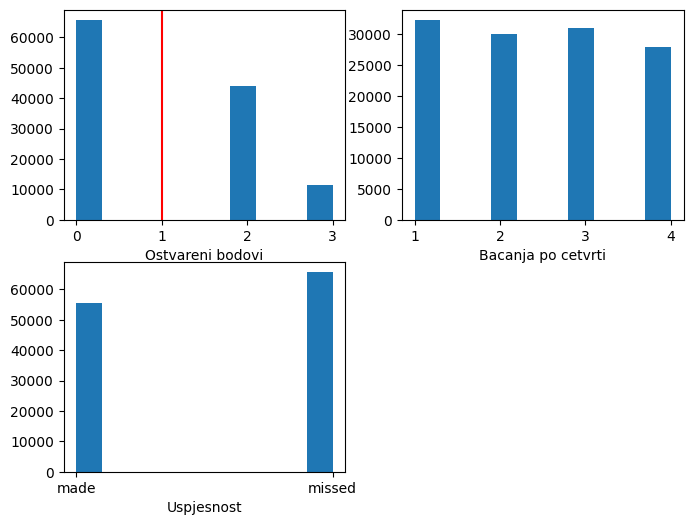

In [26]:
# histogram 1
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.hist(x.PTS)
plt.xlabel('Ostvareni bodovi')
plt.axvline(x.PTS.mean(), color = 'red', label = 'mean')

# histogram 2 
plt.subplot(2,2,2)
plt.hist(x.PERIOD)
plt.xlabel('Bacanja po cetvrti')

# histogram 3 
plt.subplot(2,2,3)
plt.hist(x.SHOT_RESULT)
plt.xlabel('Uspjesnost')
plt.show()



- Histogram 1 lijepo vizualizira distribuciju ostvarenih poena po broju bacanja. Crvena linija predstavlja mean koji je ispao 1.
- Histogram 2 nam pokazuje kolko je bacanja po cetvrti.
- Histogram 3 nam pokazuje broj promasenih i pogodenih bacanja

Histogram 2 i 3 su nam korisni, medutim, ima ih smisla i spojiti. 

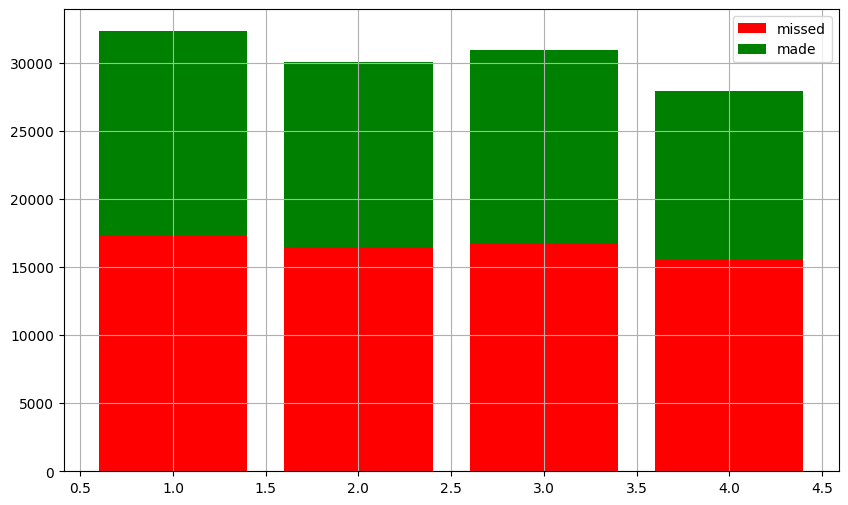

In [35]:
#mask and grouping
mask_result = x.SHOT_RESULT == "made"
count_per_period_missed = x.loc[~mask_result,:].groupby('PERIOD').count().loc[:,'player_name'].values
count_per_period_made = x.loc[mask_result,:].groupby('PERIOD').count().loc[:,'player_name'].values
title_name = x.groupby('PERIOD').count().index.values

#plot
plt.figure(figsize=(10,6))
plt.bar(title_name, count_per_period_missed, color='red', label='missed')
plt.bar(title_name, count_per_period_made, color='green', label='made', bottom=count_per_period_missed)
plt.legend(loc='best')
plt.grid()
plt.show()

Na ovom histogramu vidimo broj bacanja po periodu, a i broj ostvarenih pogodaka medu tim bacanjima

Sljedece cemo koristiti box plot za distancu bacanja, broj driblinga i preostalo vrijeme napada. 

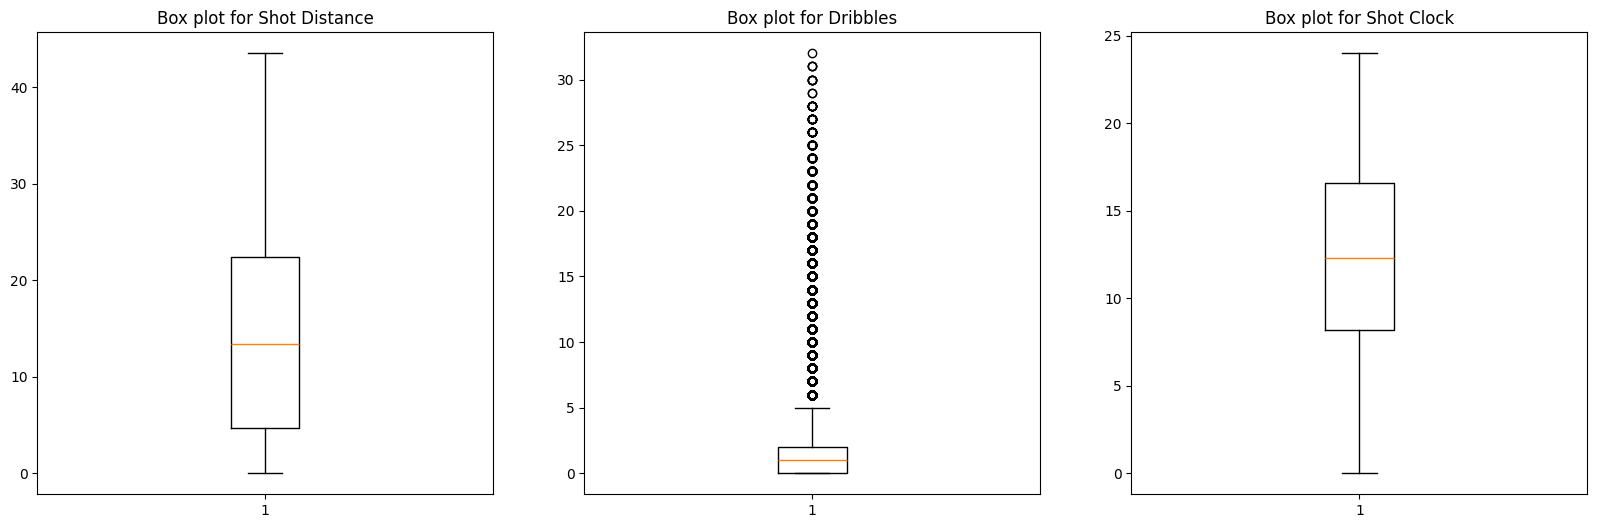

In [22]:
#boxplot za udaljenost
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.boxplot(x.SHOT_DIST)
plt.title('Box plot for Shot Distance')
#plt.show()

#boxplot za udaljenost
plt.subplot(1,3,2)
plt.boxplot(x.DRIBBLES)
plt.title('Box plot for Dribbles')

#boxplot za shot_clock
plt.subplot(1,3,3)
plt.boxplot(x.SHOT_CLOCK)
plt.title('Box plot for Shot Clock')
plt.show()

Mozemo vidjeti max i min vrijednosti, kao i median i kvartale. Minimalna vrijednost je brk ispod, dok je maksimalna brk iznad. Median je crtica na sredini pravokutnika, dok su kvartali donja i gornja stranica pravkutnika. Krugovi predstavljaju outliere.

Sljedeci je scatter plot koji prikazuje da li je bacanje uspjesno u ovisnosti o udaljenosti od kosa i najblizem obrambenom igracu.

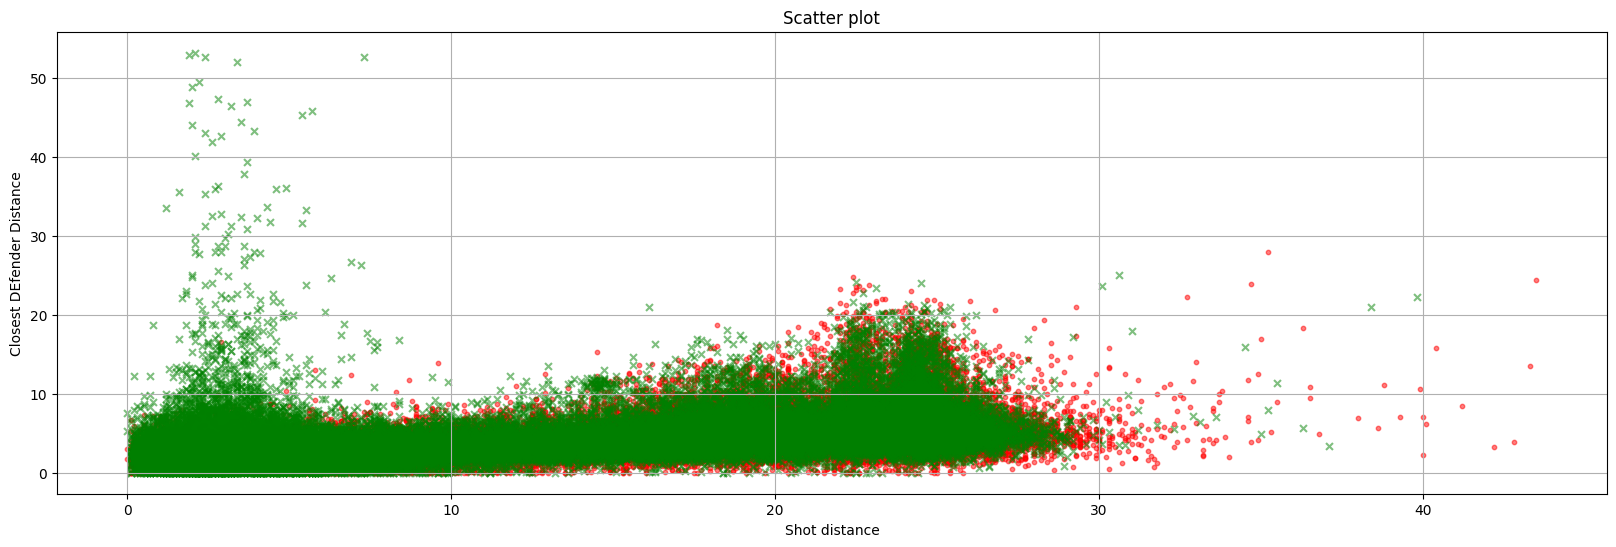

In [24]:
#mask
mask_result = x.SHOT_RESULT == "made"

#scatter plot
plt.figure(figsize=(20,6))
plt.scatter(x.loc[~mask_result,'SHOT_DIST'], x.loc[~mask_result,'CLOSE_DEF_DIST'], s=10, alpha=0.5, c='r', label='missed')
plt.scatter(x.loc[mask_result,'SHOT_DIST'], x.loc[mask_result,'CLOSE_DEF_DIST'], alpha=0.5, marker='x', s = 25, c='g', label='made')
plt.xlabel('Shot distance')
plt.ylabel('Closest DEfender Distance')
plt.title('Scatter plot')
plt.grid()
plt.show()

Ovakav graf nam daje dobar nacin da vidimo individualna bacanja. Vidimo da velika vecina uspjesnih bacanja se dogodila kad je igrac blizu kosa. Vecina neuspjesnih bacanja je na vecoj udaljenosti od kosa u kombinaciji s vrlo bliskim obrambenim igracem. 

## Seaborn
Sljedeca je mreza koristenjem seaborna. Znacajka kojemo cemo koristiti u mrezi i usporedivati odnose su Final_margin, Shot_Clock, Dribbles. Touch_Time, Shot_Distance i Shot_Result.

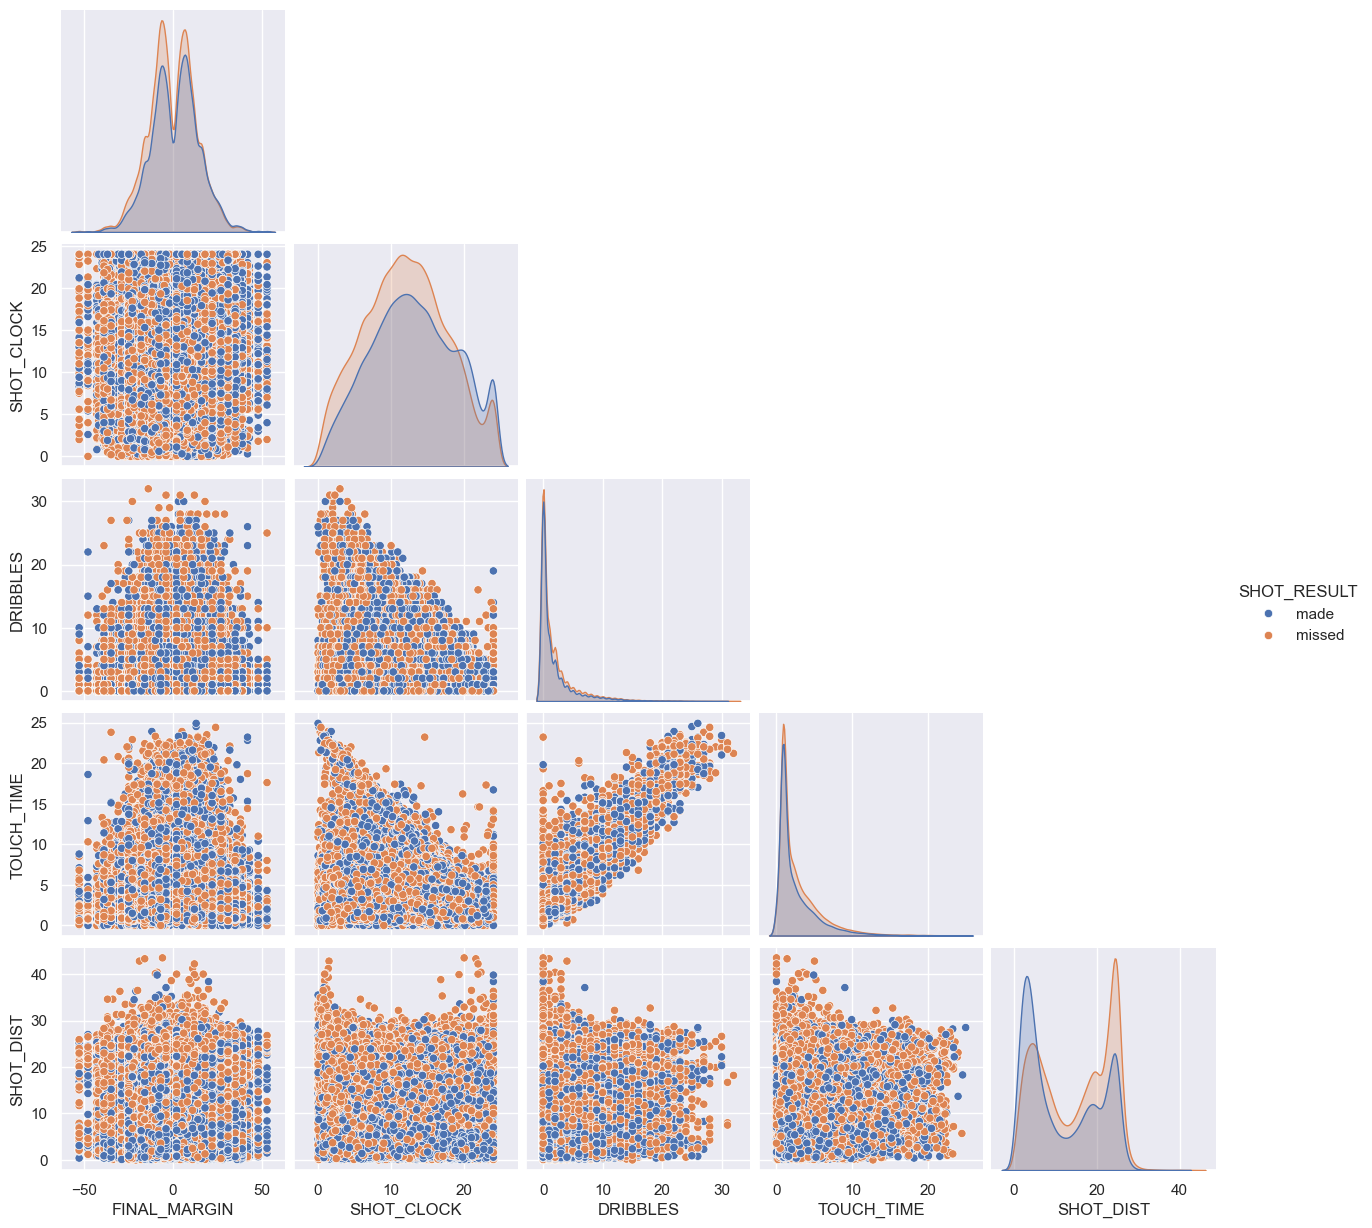

In [37]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(x.loc[:,['FINAL_MARGIN', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'SHOT_RESULT']], hue="SHOT_RESULT", corner=True)
plt.show()

Dodatno, iskoristit cemo seabornov violinski graf za prikaz koliko je bacanja pogodeno ili promaseno u ovisnosti o distanci.Graf je i podijeljen ovisno o tome da li je bacanje bilo na domacem terenu (H) ili gostujucem (A)

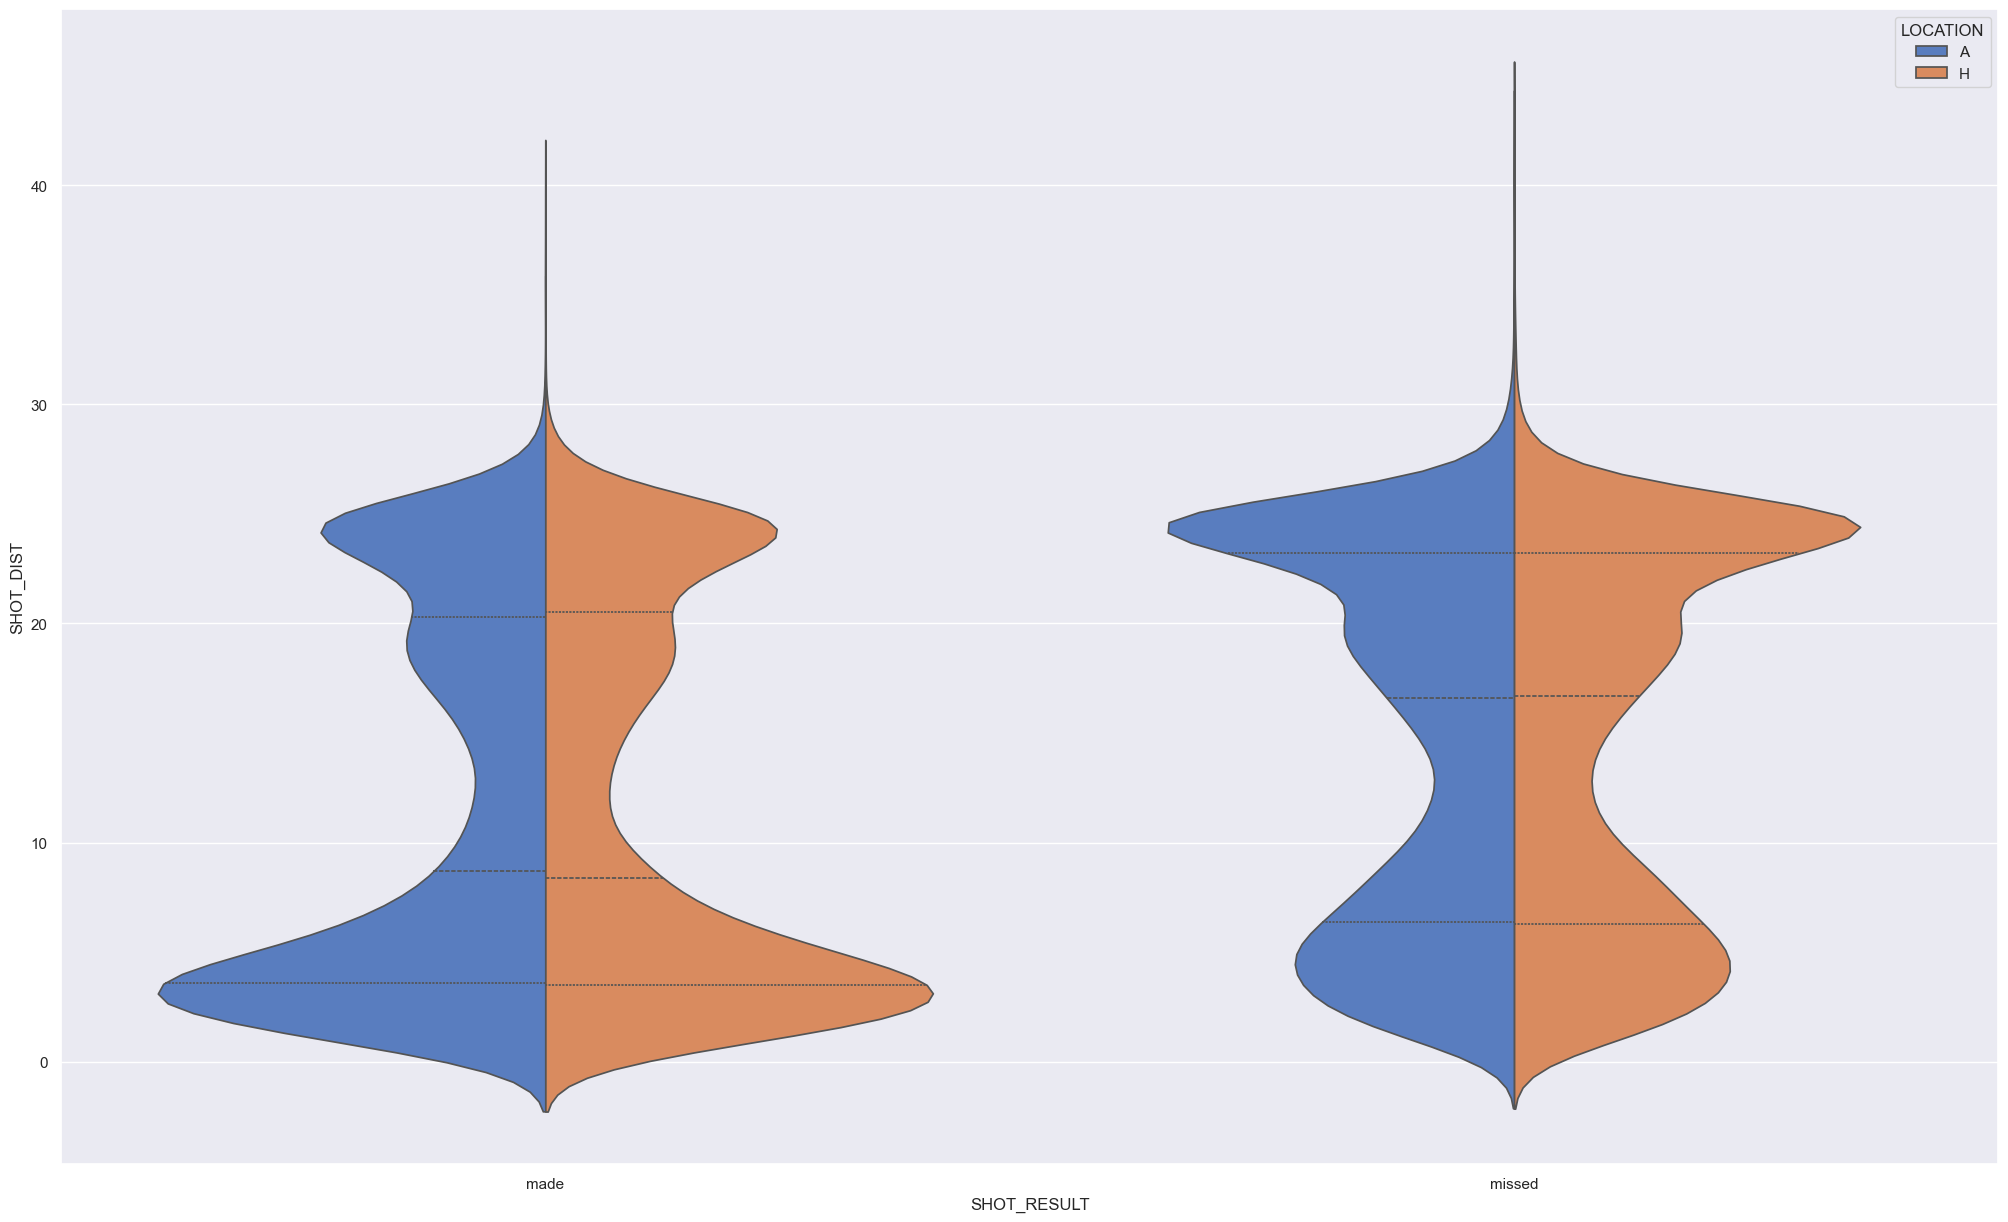

In [47]:
sns.violinplot(x="SHOT_RESULT", y="SHOT_DIST", hue="LOCATION", data = x,palette="muted", split=True, inner="quartile")
plt.show()